In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA FROM https://www.kaggle.com/datasets/danielpanizzo/wine-quality

In [ ]:
#reading the data
wine=pd.read_csv("WineQT.csv")
#dropping columns which is of no use in predicting data
wine.drop(["Id","total sulfur dioxide"],axis=1,inplace=True)
#grouping data by mean method
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,0.995553,3.240625,0.766250,11.937500


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#dropping null elements
wine.dropna(inplace=True)

In [449]:
#FEATURE ENGINEERING
X=wine.drop(["quality"],axis=1)
y=wine["quality"]

In [450]:
#SPLITING THE DATA INTO TRAINING AND TEST DATASET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
X_train.shape

(914, 11)

In [ ]:
y_train.shape

(914,)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>],
       [<Axes: title={'center': 'alcohol'}>, <Axes: >, <Axes: >]],
      dtype=object)

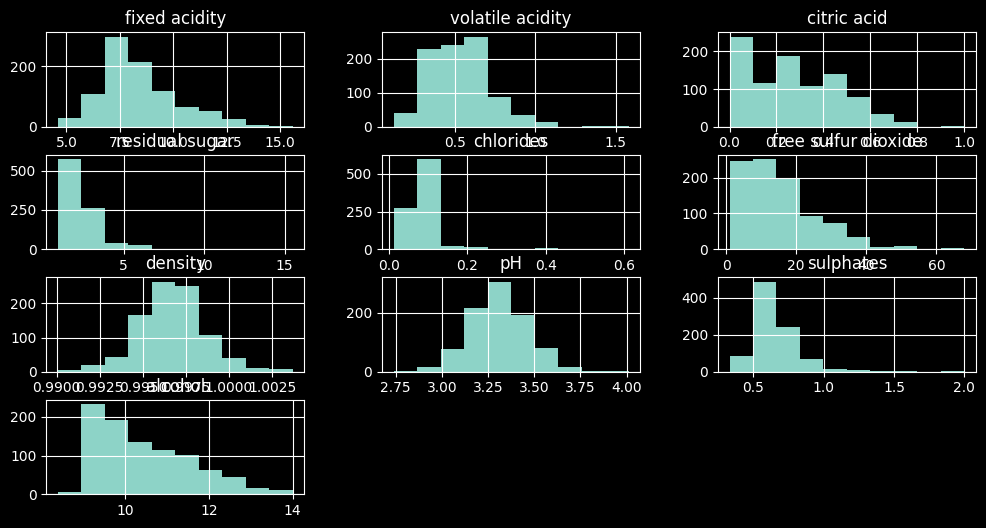

In [451]:
#PLOTTING HISTOGRAM FOR TRAINING DATASET
plt.style.use('dark_background')
X_train.hist(figsize=(12,6))

###FINDING CORRELATION BETWEEN DATA AND REMOVING DATA WHICH IS OF NO USE (TOTAL SULPHUR DIOXIDE)

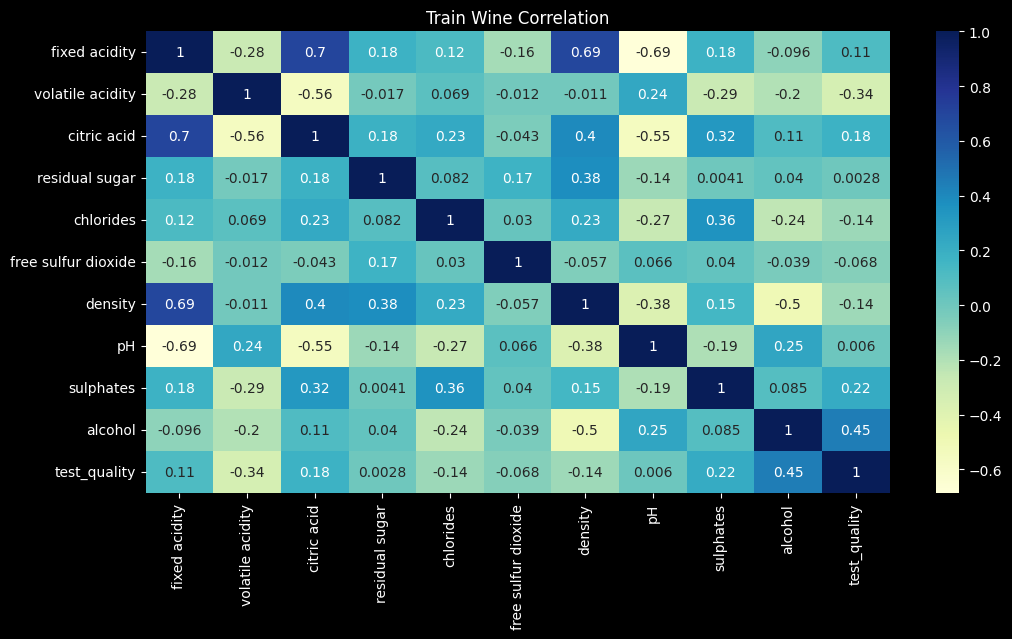

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(X_train.corr(),cmap="YlGnBu",annot=True)
plt.title("Train Wine Correlation")
plt.show()

###LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
#initialising and fitting in the linear regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
#predicting the y value from the model
y_pred_lr=lr_model.predict(X_test)
#finding the r2_score
lr_model.score(X_test,y_test)

0.7673562323014631

In [ ]:
#mean_absolute_percentage error
from sklearn.metrics import mean_absolute_percentage_error
print("mean_absolute_percentage_error: ",mean_absolute_percentage_error(y_pred_lr,y_test))

mean_absolute_percentage_error:  0.044235359097294084


###DATA PREDICTION

In [ ]:
#creating a table of predictions and actual value for model evaluation
index=["predictions","actual"]
table=pd.DataFrame([y_pred_lr[:10],y_test[:10]],index=index)
table

,0,1,2,3,4,5,6,7,8,9
predictions,6.344415,4.77444,6.120365,6.48669,5.915229,4.674761,6.46965,4.97009,6.103111,6.006467
actual,7.000000,4.00000,6.000000,6.00000,6.000000,5.000000,6.00000,5.00000,6.000000,6.000000


###NUERAL NETWORK LINEAR REGRESSION

In [ ]:
import tensorflow as tf

In [ ]:
#FUNCTION TO PLOT HISTORY GRAPH
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
  ax1.plot(history.history["loss"])
  ax1.plot(history.history["val_loss"])
  ax1.set_xlabel("epochs")
  ax1.set_ylabel("Loss")
  ax1.legend(["loss","val_loss"])
  ax1.grid(True)

  ax2.plot(history.history["mae"])
  ax2.plot(history.history["val_mae"])
  ax2.set_xlabel("epochs")
  ax2.set_ylabel("MAE")
  ax2.legend(["mae","val_mae"])
  ax2.grid(True)

  plt.show()

In [ ]:
#FUNCTION TO PLOT HISTORY GRAPH
from keras.constraints import NonNeg
def train_model(X_train,y_train,num_nodes,drop_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(1,activation='linear')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss="mean_squared_error",metrics=["mae"])
  history=nn_model.fit(X_train,y_train,batch_size,epochs,validation_split=0.3,verbose=0)
  return nn_model,history

###TRAINING NUERAL NETWORK

epochs: 100, num_nodes: 32, drop_prob: 0, lr: 0.1, batch_size: 32


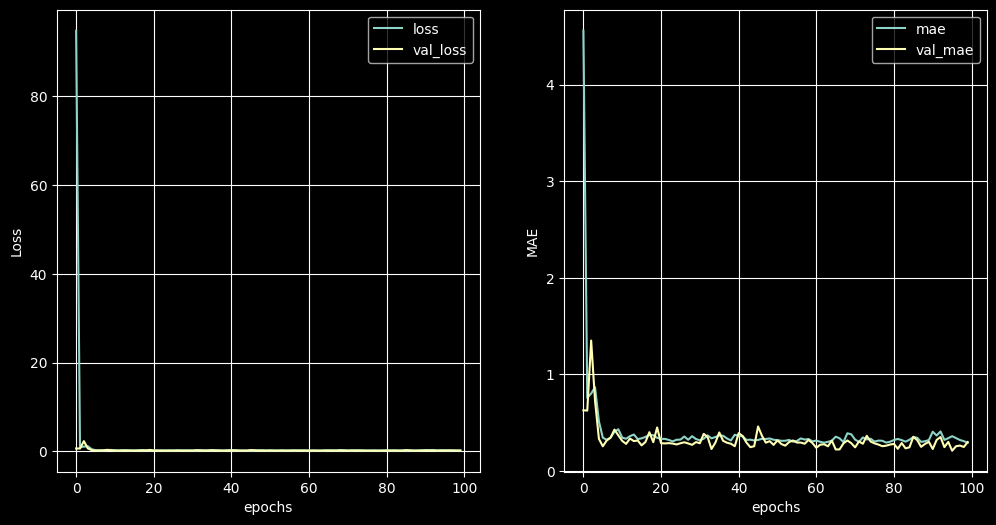

epochs: 100, num_nodes: 32, drop_prob: 0, lr: 0.1, batch_size: 64


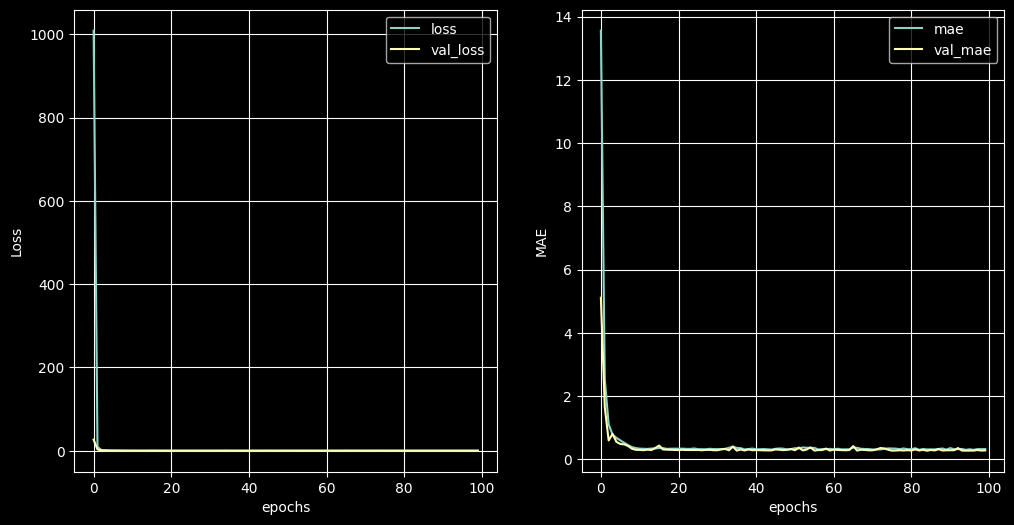

epochs: 100, num_nodes: 32, drop_prob: 0, lr: 0.05, batch_size: 32


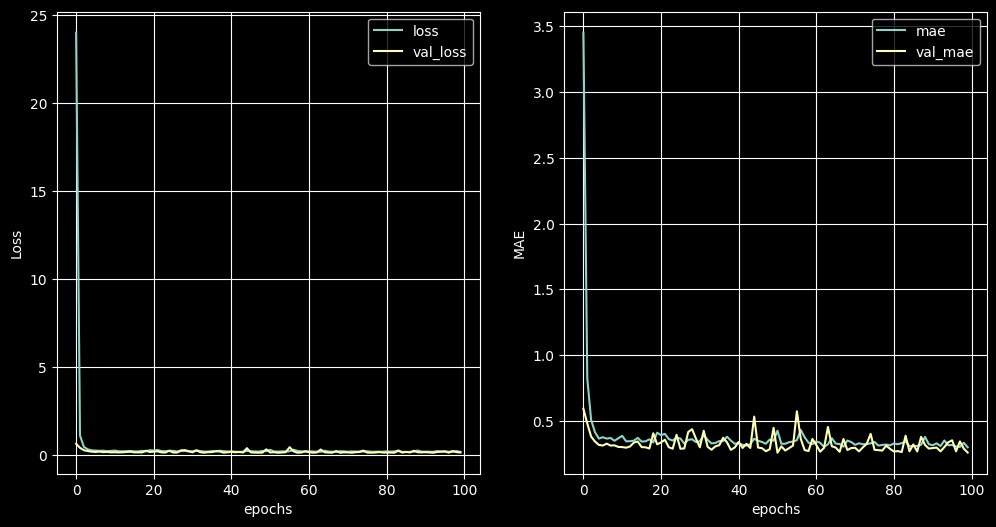

epochs: 100, num_nodes: 32, drop_prob: 0, lr: 0.05, batch_size: 64


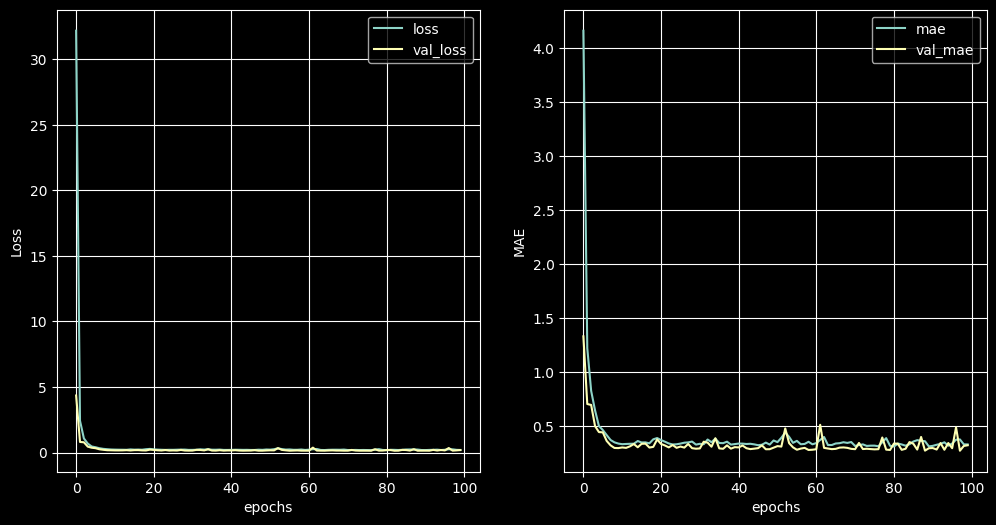

epochs: 100, num_nodes: 32, drop_prob: 0, lr: 0.01, batch_size: 32


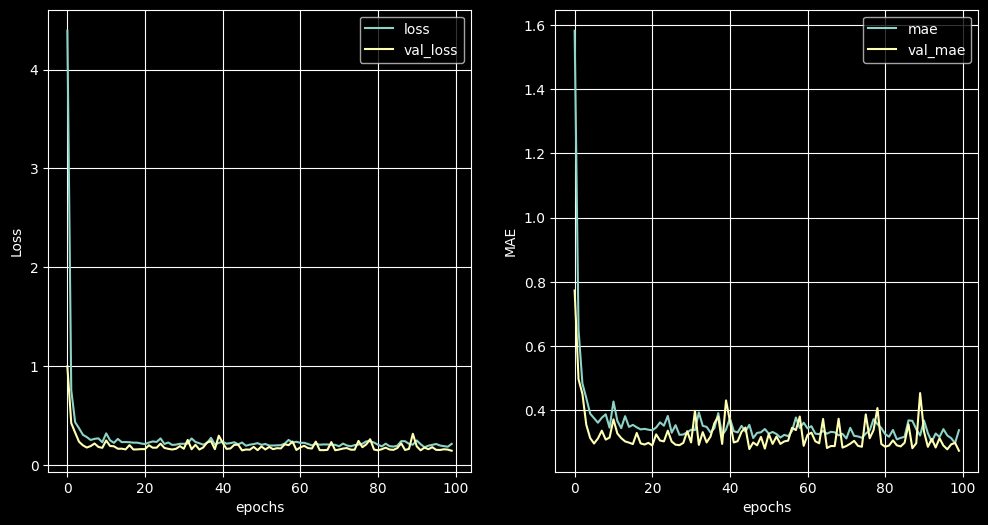

epochs: 100, num_nodes: 32, drop_prob: 0, lr: 0.01, batch_size: 64


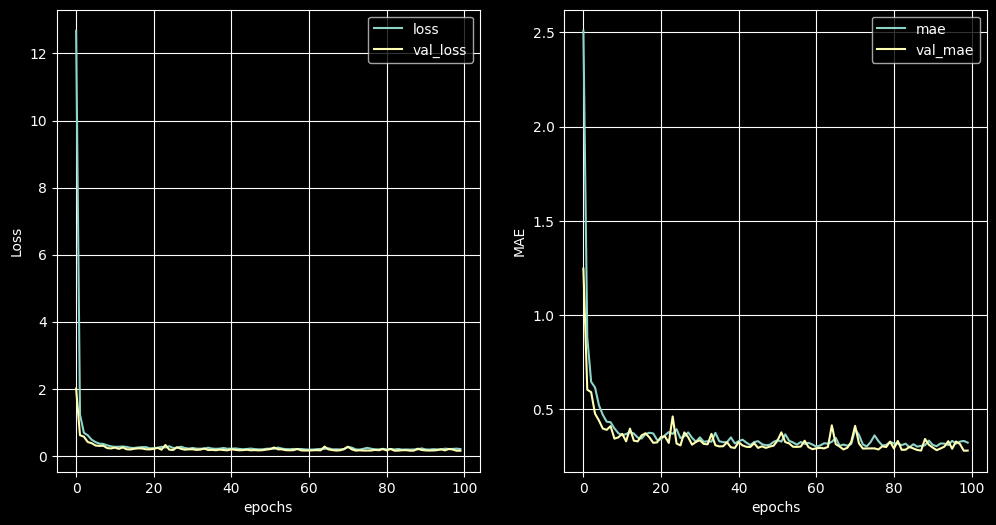

epochs: 100, num_nodes: 32, drop_prob: 0.1, lr: 0.1, batch_size: 32


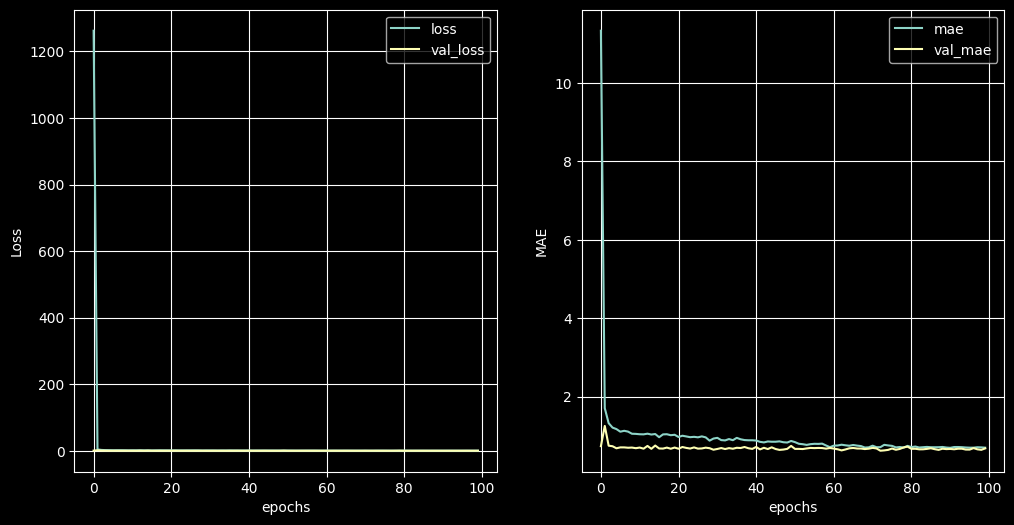

epochs: 100, num_nodes: 32, drop_prob: 0.1, lr: 0.1, batch_size: 64


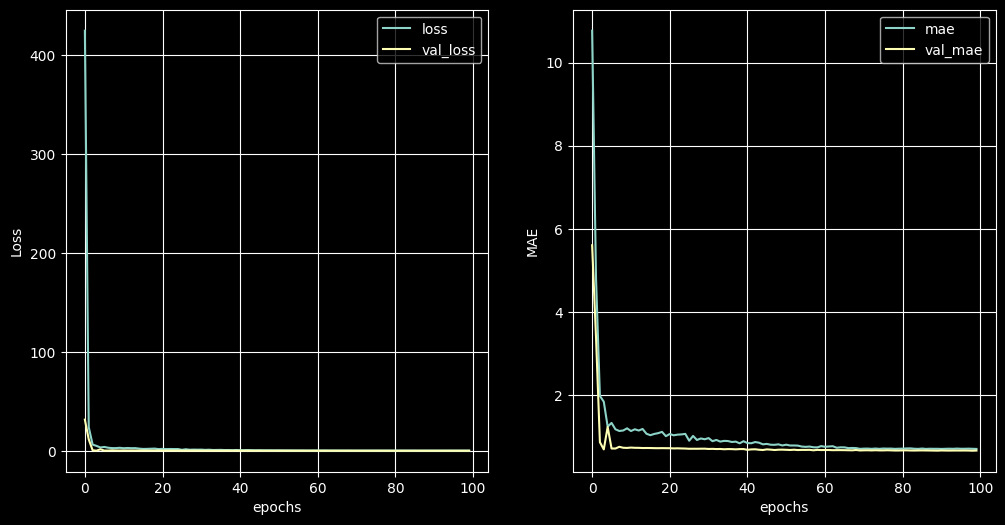

epochs: 100, num_nodes: 32, drop_prob: 0.1, lr: 0.05, batch_size: 32


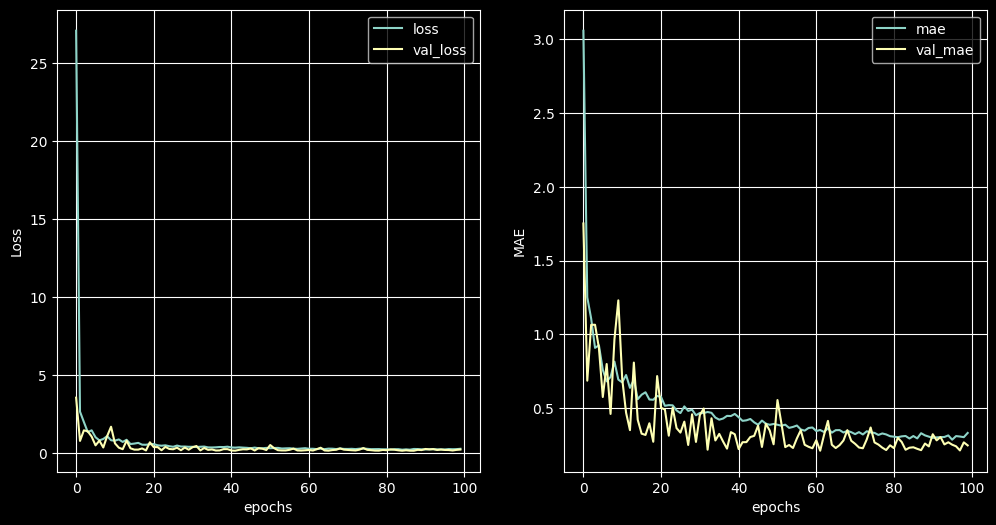

epochs: 100, num_nodes: 32, drop_prob: 0.1, lr: 0.05, batch_size: 64


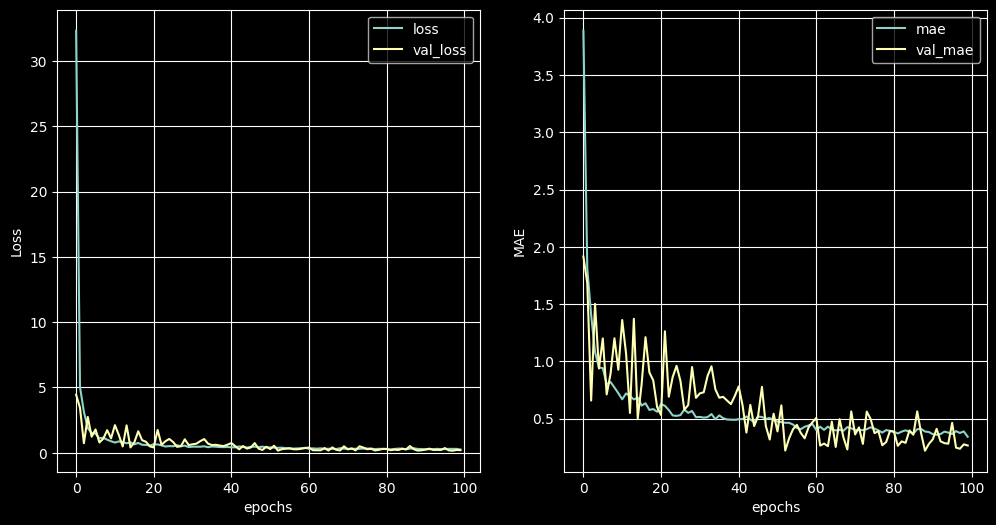

epochs: 100, num_nodes: 32, drop_prob: 0.1, lr: 0.01, batch_size: 32


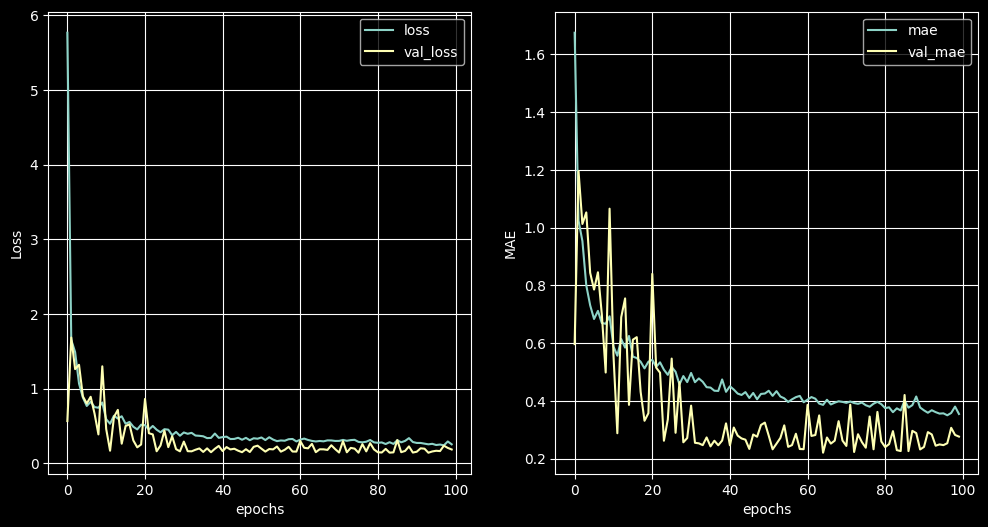

epochs: 100, num_nodes: 32, drop_prob: 0.1, lr: 0.01, batch_size: 64


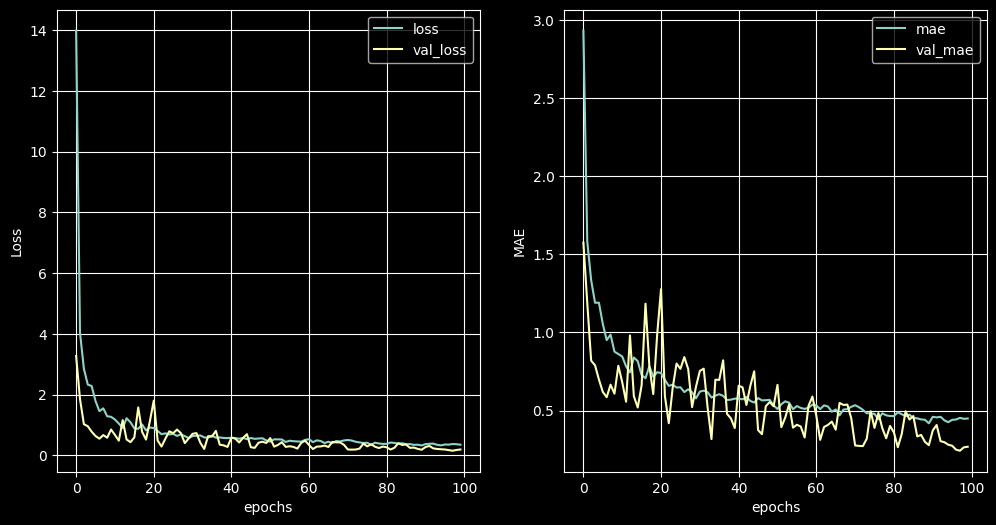

epochs: 100, num_nodes: 64, drop_prob: 0, lr: 0.1, batch_size: 32


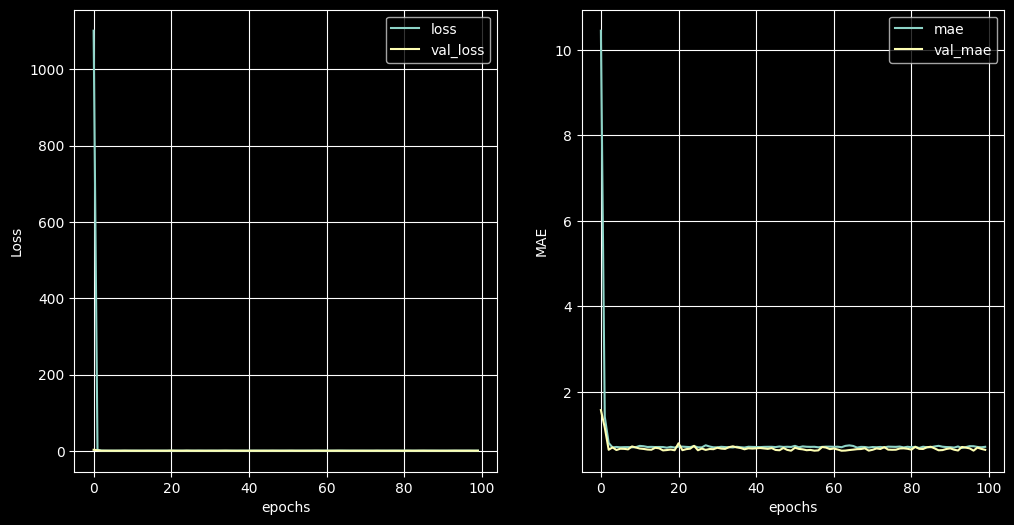

epochs: 100, num_nodes: 64, drop_prob: 0, lr: 0.1, batch_size: 64


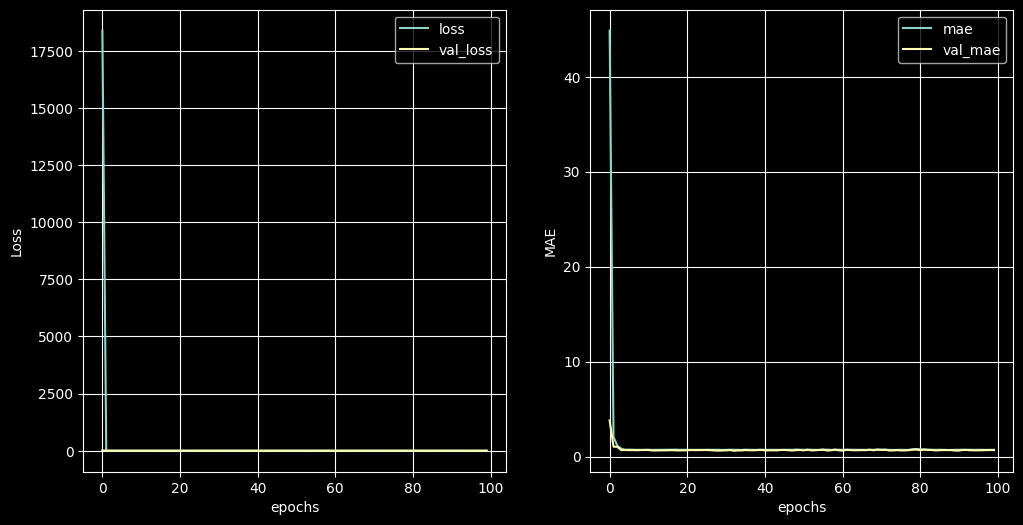

epochs: 100, num_nodes: 64, drop_prob: 0, lr: 0.05, batch_size: 32


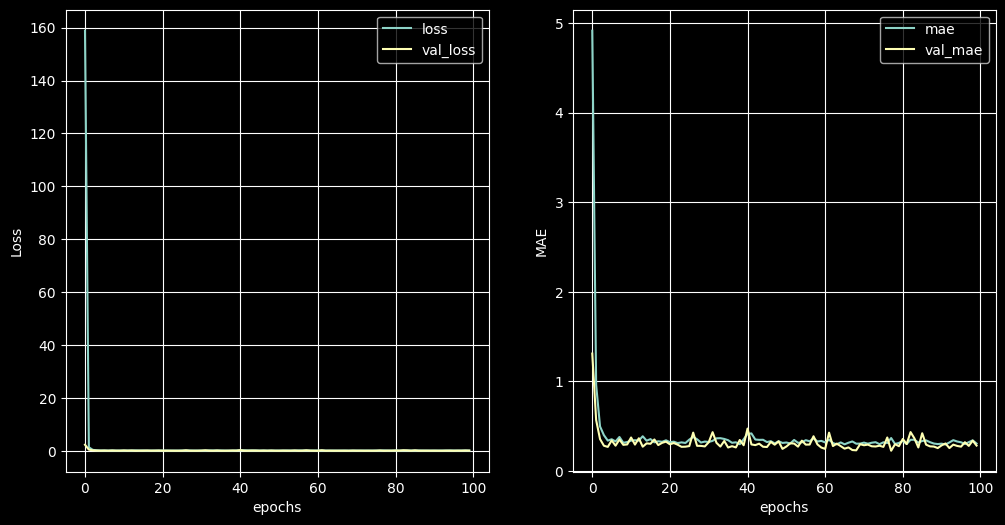

epochs: 100, num_nodes: 64, drop_prob: 0, lr: 0.05, batch_size: 64


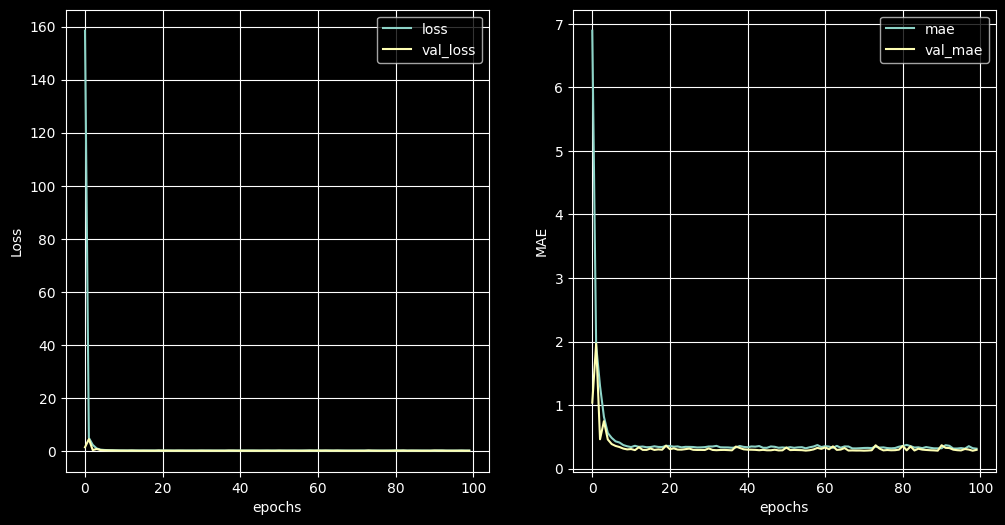

epochs: 100, num_nodes: 64, drop_prob: 0, lr: 0.01, batch_size: 32


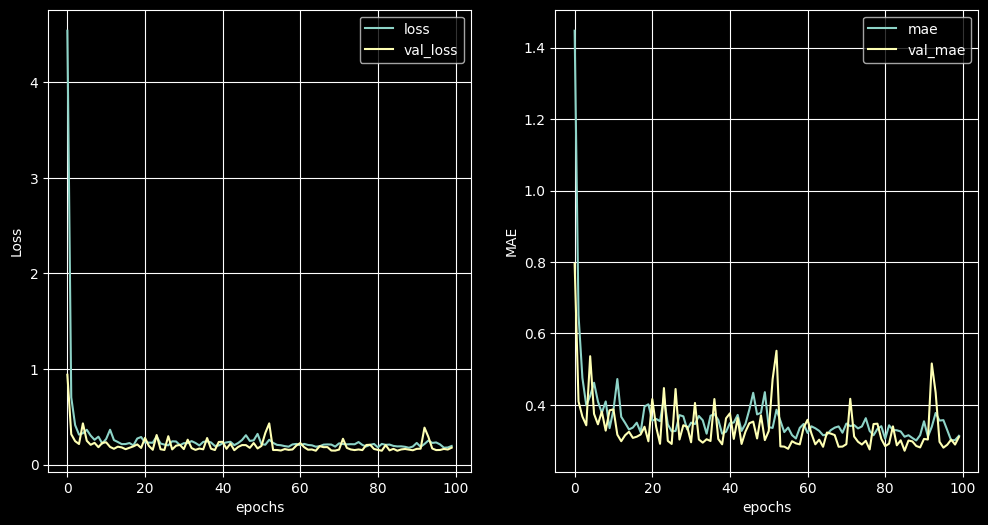

epochs: 100, num_nodes: 64, drop_prob: 0, lr: 0.01, batch_size: 64


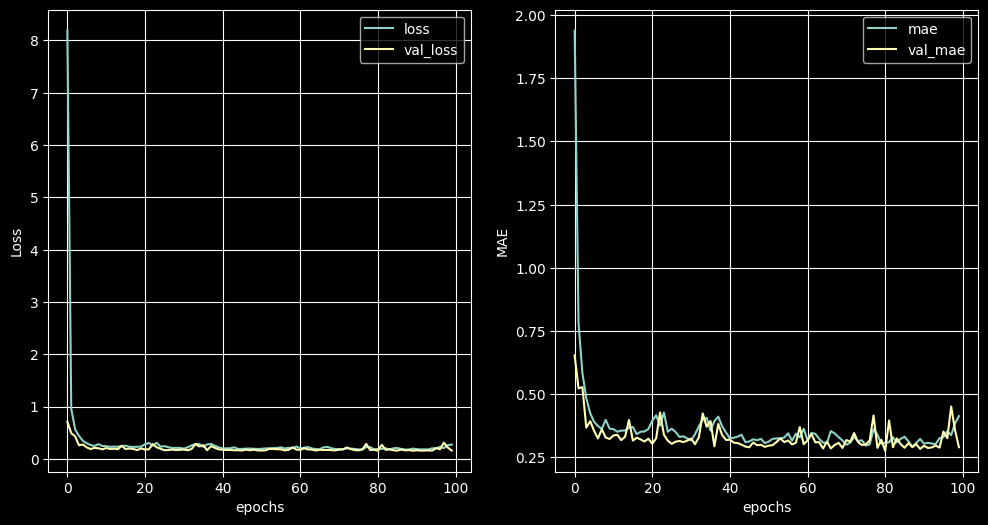

epochs: 100, num_nodes: 64, drop_prob: 0.1, lr: 0.1, batch_size: 32


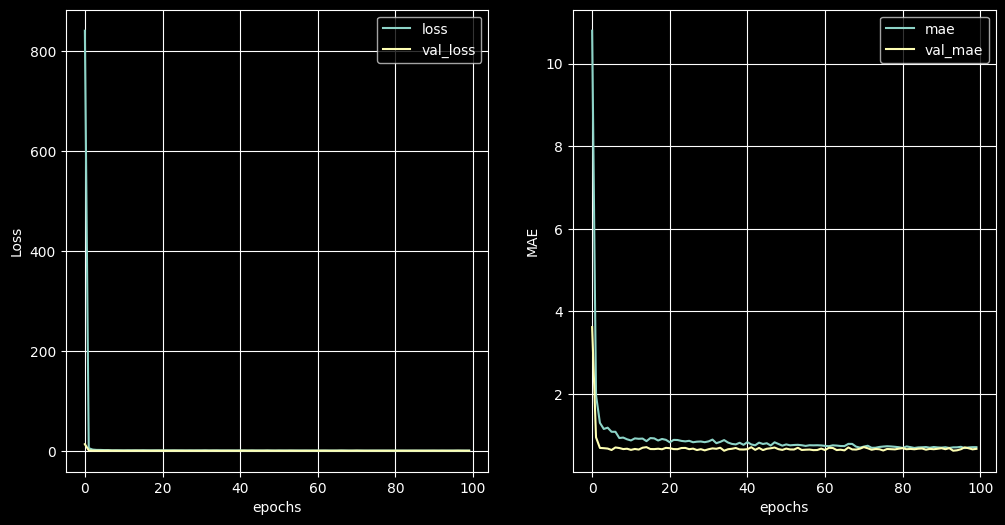

epochs: 100, num_nodes: 64, drop_prob: 0.1, lr: 0.1, batch_size: 64


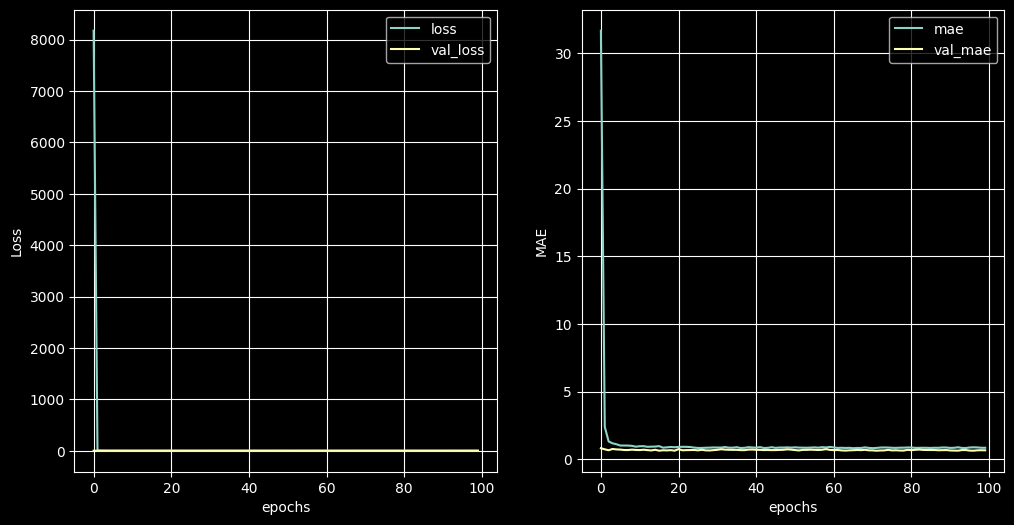

epochs: 100, num_nodes: 64, drop_prob: 0.1, lr: 0.05, batch_size: 32


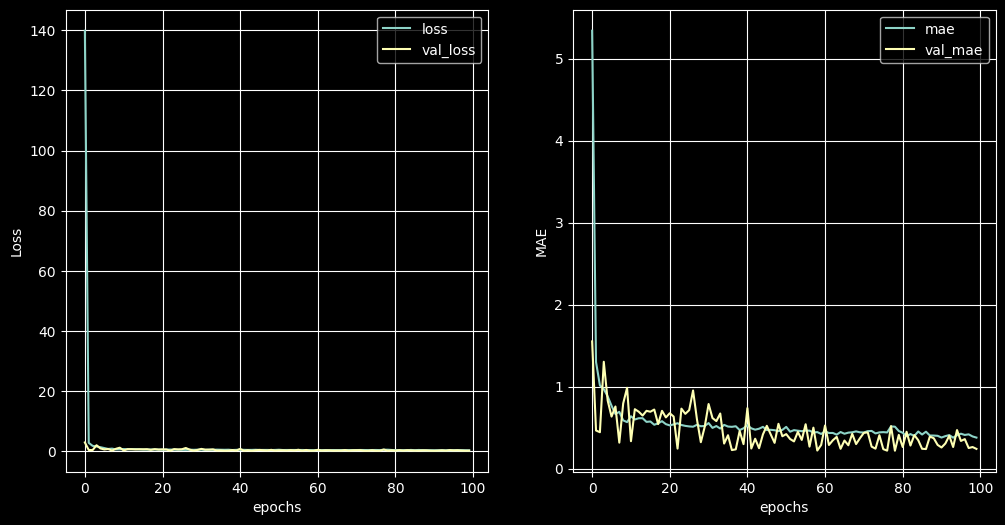

epochs: 100, num_nodes: 64, drop_prob: 0.1, lr: 0.05, batch_size: 64


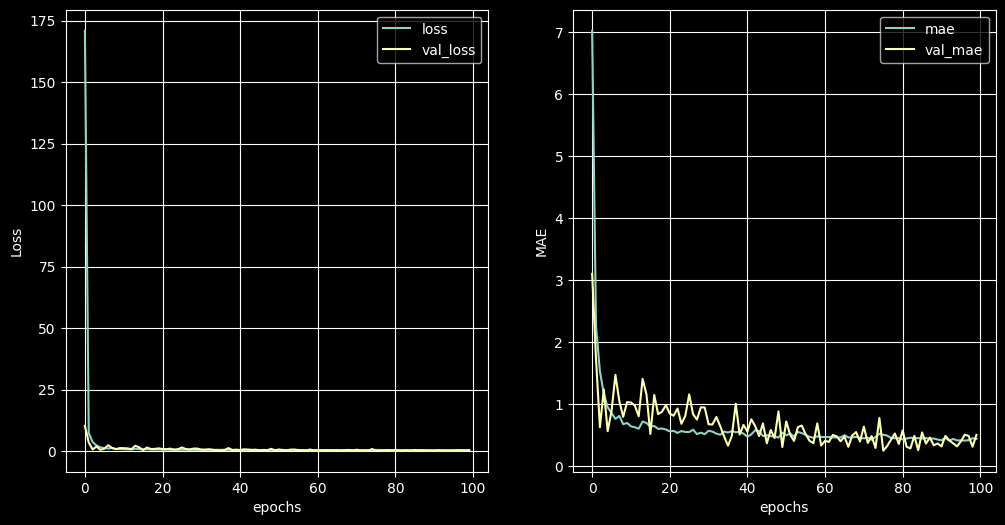

epochs: 100, num_nodes: 64, drop_prob: 0.1, lr: 0.01, batch_size: 32


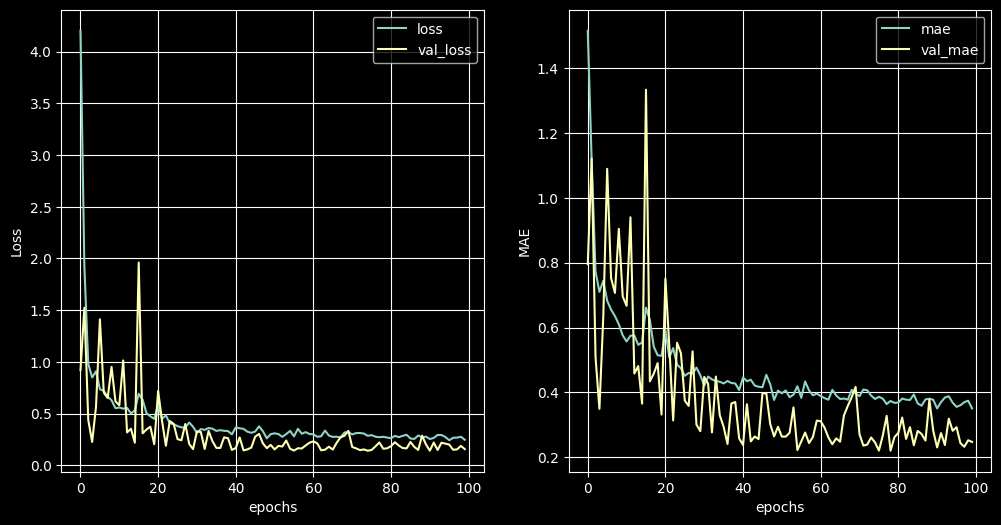

epochs: 100, num_nodes: 64, drop_prob: 0.1, lr: 0.01, batch_size: 64


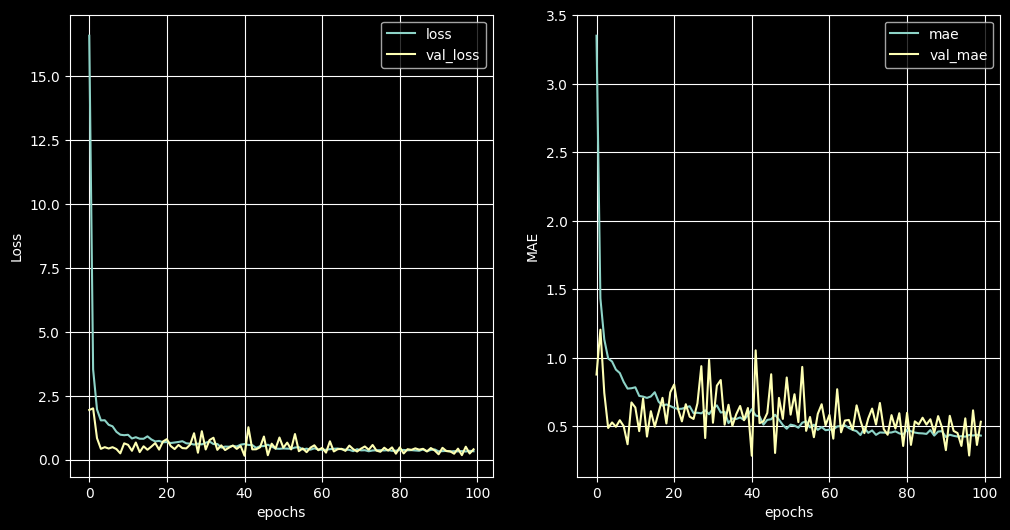

epochs: 100, num_nodes: 128, drop_prob: 0, lr: 0.1, batch_size: 32


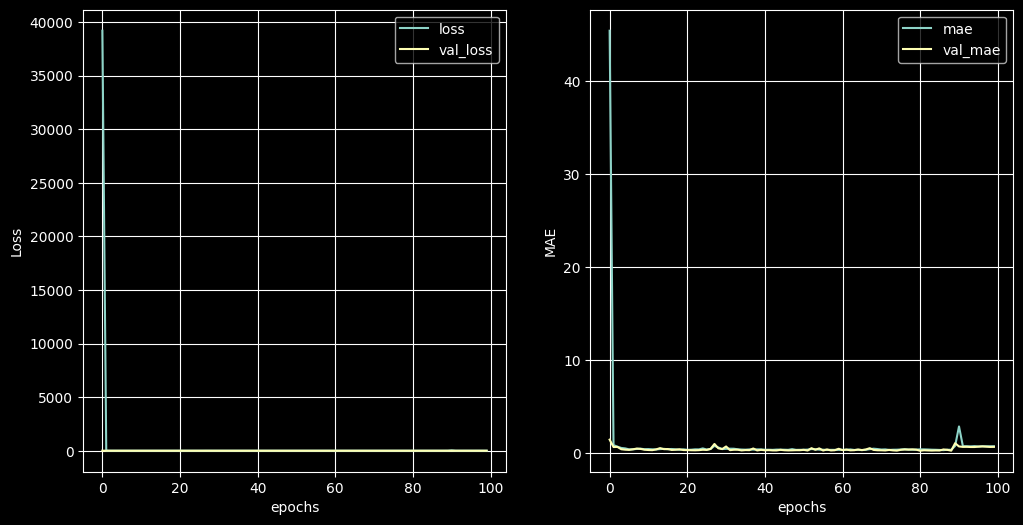

epochs: 100, num_nodes: 128, drop_prob: 0, lr: 0.1, batch_size: 64


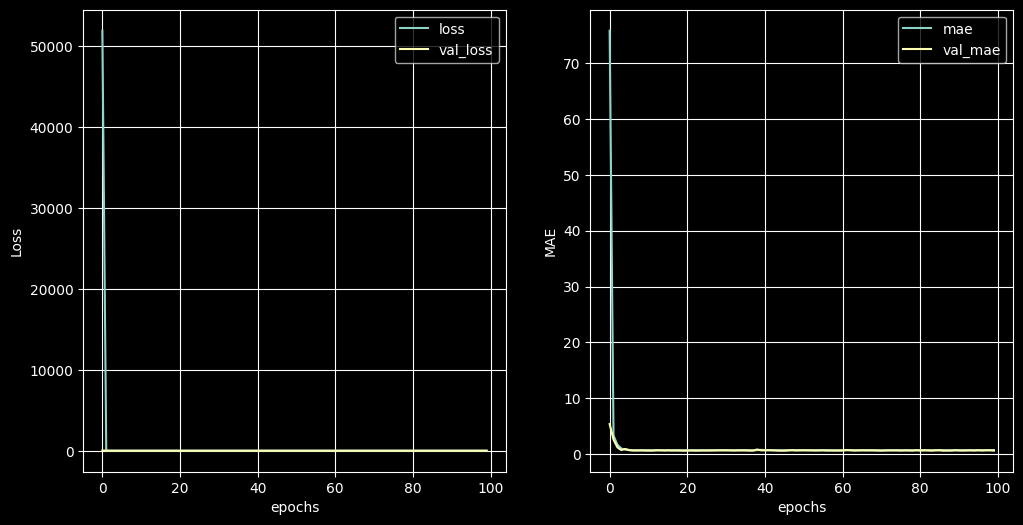

epochs: 100, num_nodes: 128, drop_prob: 0, lr: 0.05, batch_size: 32


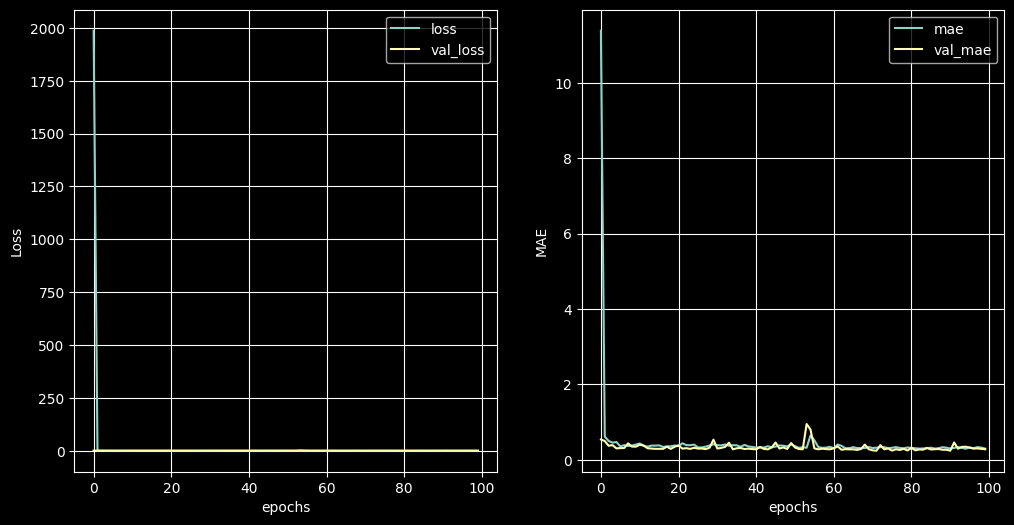

epochs: 100, num_nodes: 128, drop_prob: 0, lr: 0.05, batch_size: 64


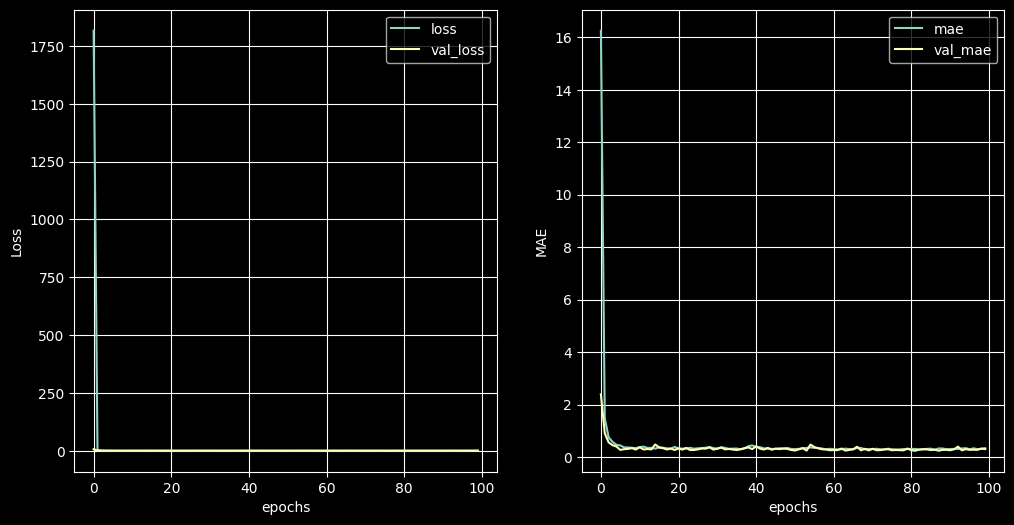

epochs: 100, num_nodes: 128, drop_prob: 0, lr: 0.01, batch_size: 32


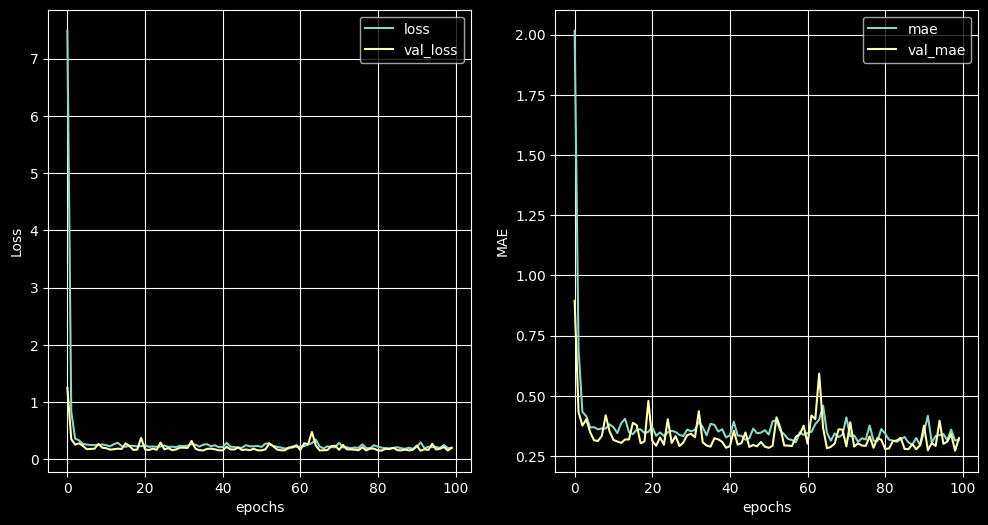

epochs: 100, num_nodes: 128, drop_prob: 0, lr: 0.01, batch_size: 64


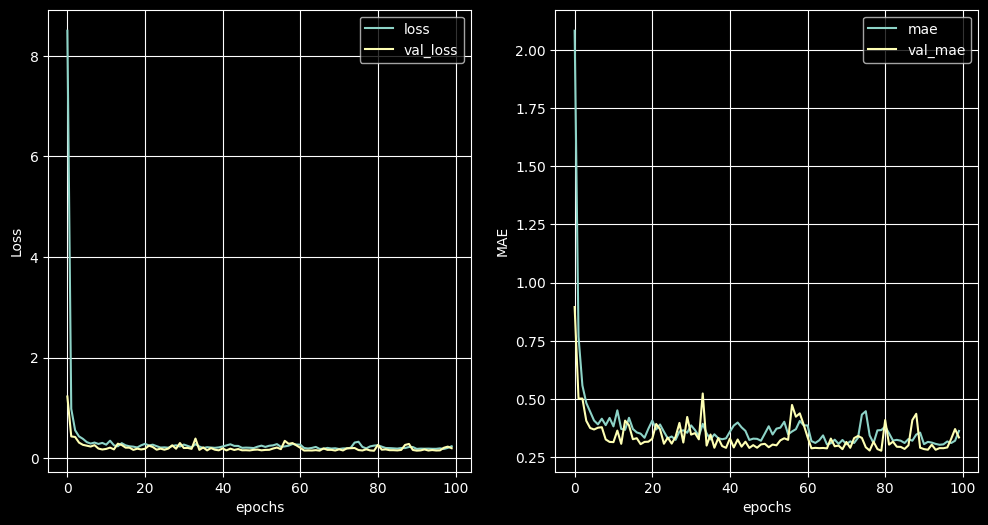

epochs: 100, num_nodes: 128, drop_prob: 0.1, lr: 0.1, batch_size: 32


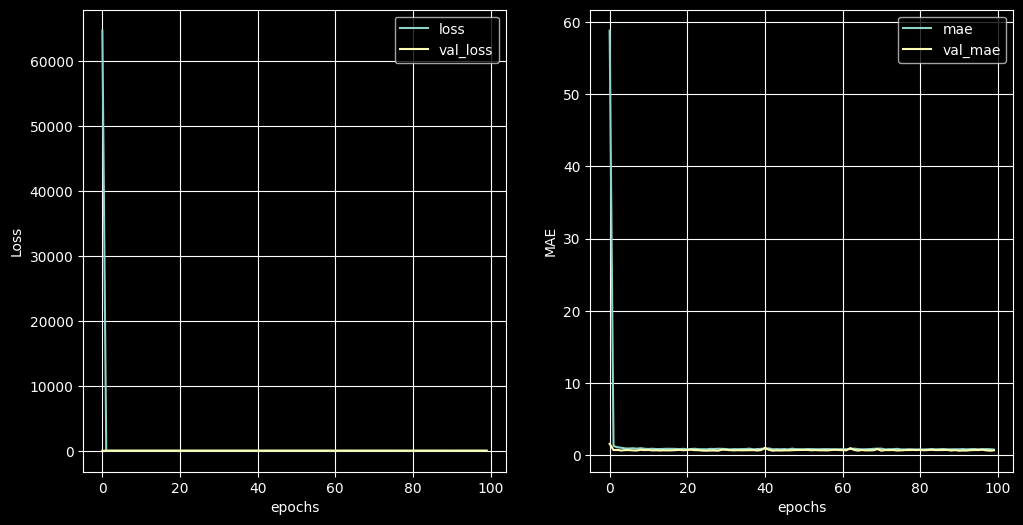

epochs: 100, num_nodes: 128, drop_prob: 0.1, lr: 0.1, batch_size: 64


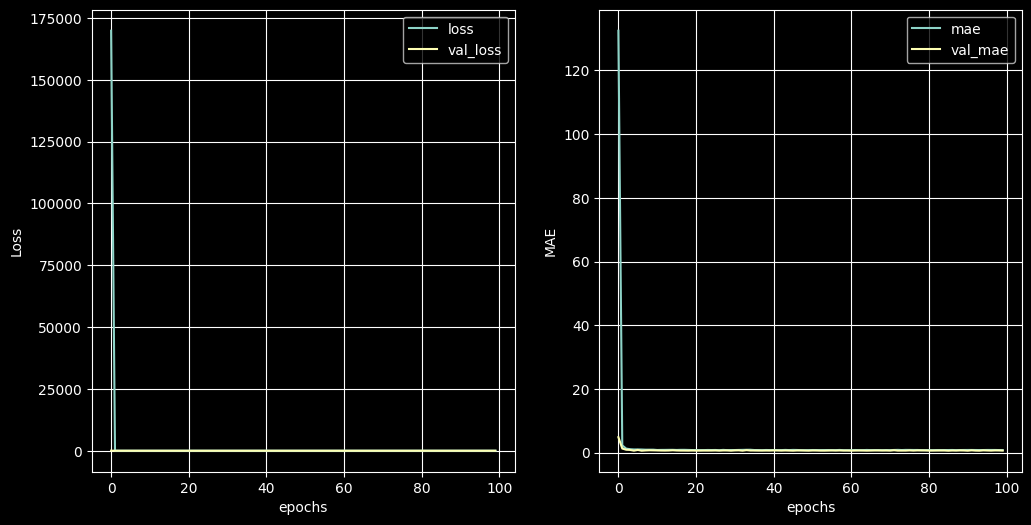

epochs: 100, num_nodes: 128, drop_prob: 0.1, lr: 0.05, batch_size: 32


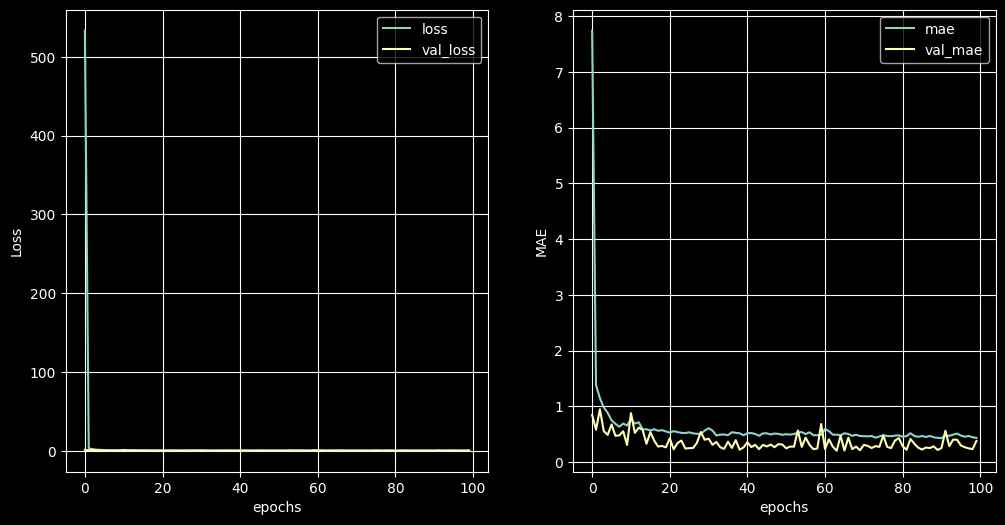

epochs: 100, num_nodes: 128, drop_prob: 0.1, lr: 0.05, batch_size: 64


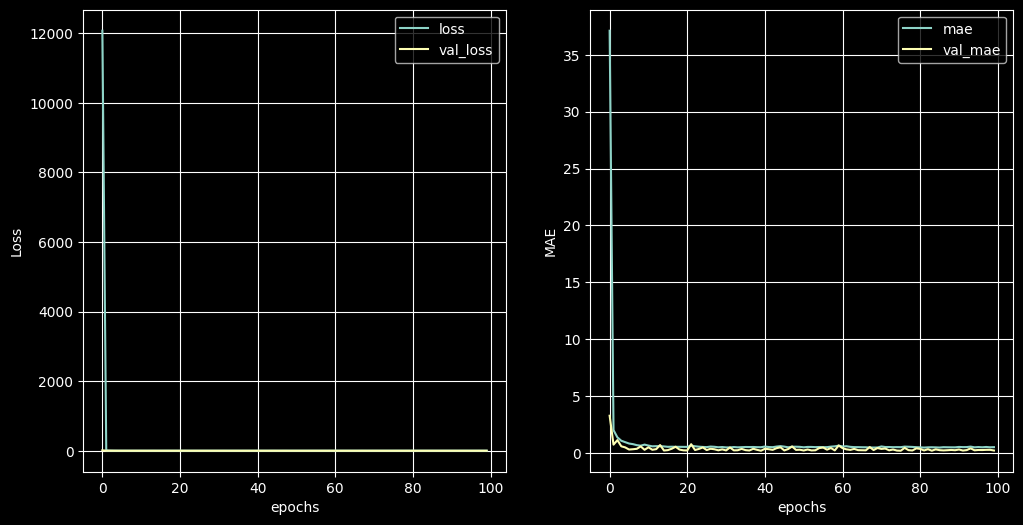

epochs: 100, num_nodes: 128, drop_prob: 0.1, lr: 0.01, batch_size: 32


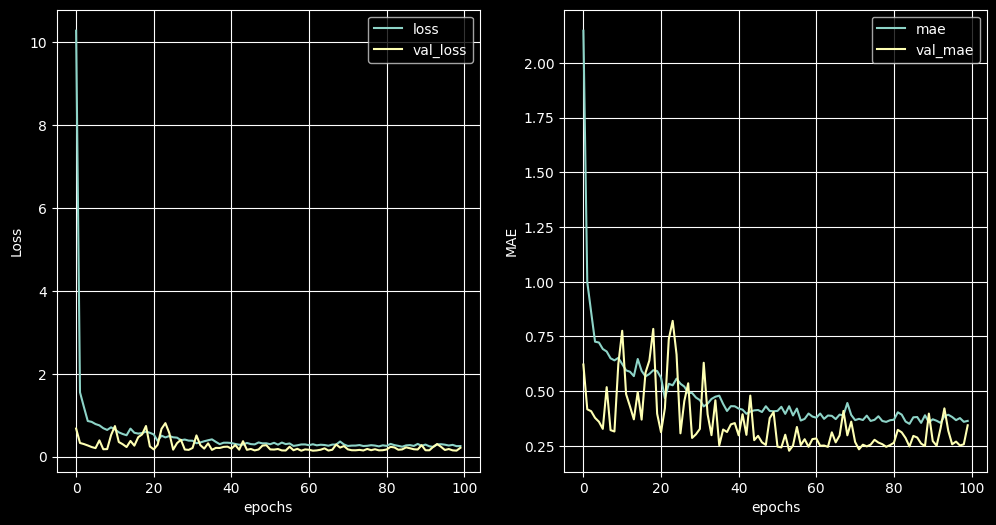

epochs: 100, num_nodes: 128, drop_prob: 0.1, lr: 0.01, batch_size: 64


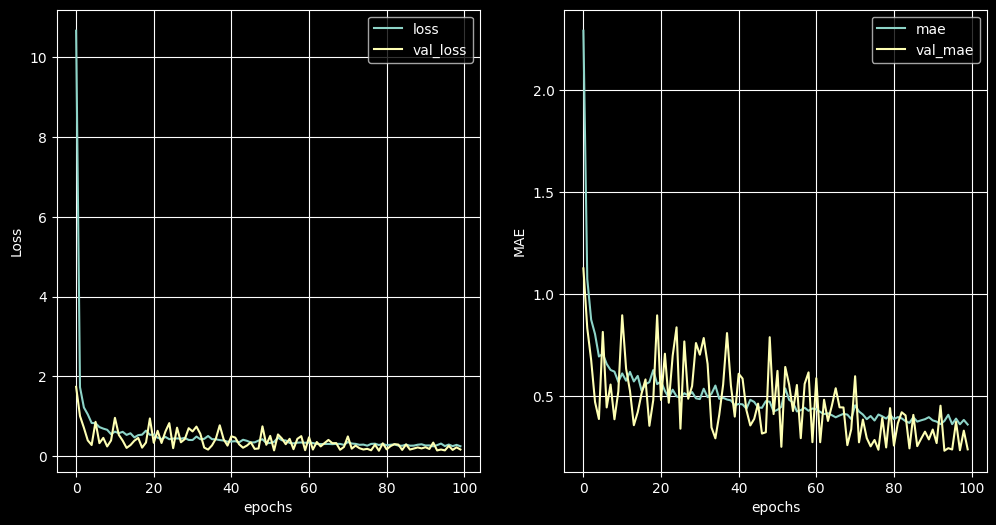

In [ ]:
epochs=100
for num_nodes in [32,64,128]:
  for drop_prob in [0,0.1]:
    for lr in [0.1,0.05,0.01]:
      for batch_size in [32,64]:
        print(f"epochs: {epochs}, num_nodes: {num_nodes}, drop_prob: {drop_prob}, lr: {lr}, batch_size: {batch_size}")
        model,history=train_model(X_train,y_train,num_nodes,drop_prob,lr,batch_size,epochs)
        plot_history(history)

In [ ]:
#evaluating the model
model.evaluate(X_test,y_test)
#predicting the y value from the model
y_pred_nn=model.predict(X_test)

8/8 [==============================] - 0s 3ms/step


In [ ]:
print("mean_absolute_percentage_error: ",mean_absolute_percentage_error(y_pred_nn,y_test))
#reshaping the predicted y values so that it would fix in the data frame formed below
y_pred_nn=y_pred_nn.reshape(229,)

mean_absolute_percentage_error:  0.03754283909920834


In [ ]:
#creating a table of predictions and actual value for model evaluation
index_nn=["predictions","actual"]
table_nn=pd.DataFrame([y_pred_nn[:10],y_test[:10]],index=index_nn)
table

,0,1,2,3,4,5,6,7,8,9
predictions,6.344415,4.77444,6.120365,6.48669,5.915229,4.674761,6.46965,4.97009,6.103111,6.006467
actual,7.000000,4.00000,6.000000,6.00000,6.000000,5.000000,6.00000,5.00000,6.000000,6.000000


###DATA PLOT AS AN OVERLAP LINE PLOT TO SHOW HOW MUCH THEY MATCH

<ipython-input-374-1ff6910e95e3>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m--" (-> color='m'). The keyword argument will take precedence.
  plt.plot(y_test,y_pred_lr,'m--',color="blue",alpha=0.8)
<ipython-input-374-1ff6910e95e3>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m--" (-> color='m'). The keyword argument will take precedence.
  plt.plot(y_test,y_pred_nn,'m--',color="yellow",alpha=0.5)


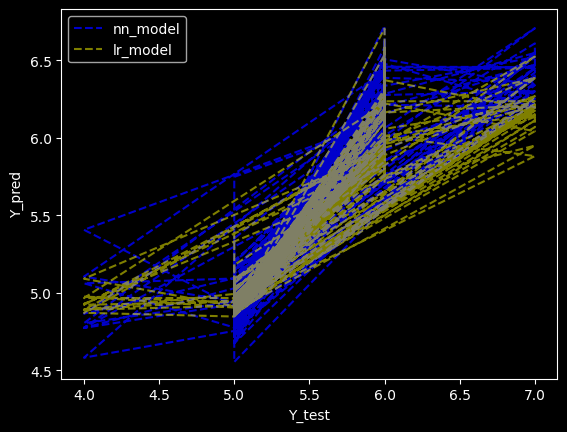

In [ ]:
plt.style.use('dark_background')
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.plot(y_test,y_pred_lr,'m--',color="blue",alpha=0.8)
plt.plot(y_test,y_pred_nn,'m--',color="yellow",alpha=0.5)
plt.legend(["nn_model","lr_model"])
plt.show()